#### Data extractions

In [15]:
!wget 'https://s3.amazonaws.com/capitalbikeshare-data/202209-capitalbikeshare-tripdata.zip'
import zipfile
zip_ref = zipfile.ZipFile('/home/susearc/Documents/github/Python-practice-projects/202209-capitalbikeshare-tripdata.zip','r')
zip_ref.filelist
zip_ref.extract(member=zip_ref.filelist[0])

--2022-10-18 11:05:04--  https://s3.amazonaws.com/capitalbikeshare-data/202209-capitalbikeshare-tripdata.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.93.237
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.93.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14213561 (14M) [application/zip]
Saving to: ‘202209-capitalbikeshare-tripdata.zip’

202209-capitalbikes 100%[===================>]  13.55M  3.43MB/s    in 3.9s    

2022-10-18 11:05:10 (3.43 MB/s) - ‘202209-capitalbikeshare-tripdata.zip’ saved [14213561/14213561]



'/home/susearc/Documents/github/Python-practice-projects/202209-capitalbikeshare-tripdata.csv'

In [16]:
### Data Retrieval

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [18]:
bikedf = pd.read_csv('/home/susearc/Documents/github/Python-practice-projects/202209-capitalbikeshare-tripdata.csv')

In [21]:
bikedf.head()
bikedf.shape

(386085, 13)

In [25]:
bikedf.describe()

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,373135.000000,371400.000000,386085.000000,386085.000000,385521.000000,385521.000000
mean,31368.248165,31370.772504,38.902470,-77.032276,38.901088,-77.031635
std,254.300117,252.641553,0.026741,0.032642,0.067989,0.128211
min,31000.000000,31000.000000,38.780000,-77.400000,0.000000,-77.368416
25%,31212.000000,31214.000000,38.890496,-77.045000,38.890400,-77.045000
50%,31276.000000,31276.000000,38.902571,-77.031898,38.902000,-77.031887
75%,31605.000000,31609.000000,38.913046,-77.013769,38.912100,-77.013500
max,32901.000000,32902.000000,39.125828,-76.825535,39.125828,0.000000


In [27]:
bikedf.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C40CF15D0DBE584E,classic_bike,2022-09-23 18:42:27,2022-09-24 08:27:11,Georgia Ave & Morton St NW,31419.0,14th St Heights / 14th & Crittenden St NW,31402.0,38.932128,-77.023500,38.947774,-77.032818,member
1,3788C1944643B399,classic_bike,2022-09-22 01:35:01,2022-09-22 01:49:59,7th & T St NW,31109.0,7th St & Massachusetts Ave NE,31647.0,38.915693,-77.021703,38.892220,-76.996020,member
2,A9E14A3286BB0922,classic_bike,2022-09-16 17:04:11,2022-09-16 17:08:40,7th & F St NW / National Portrait Gallery,31232.0,North Capitol St & F St NW,31624.0,38.897283,-77.022191,38.897446,-77.009888,member
3,77518ADEB4313901,classic_bike,2022-09-29 17:24:21,2022-09-29 18:32:05,14th & D St NW / Ronald Reagan Building,31231.0,4th & East Capitol St NE,31618.0,38.894514,-77.031617,38.889955,-77.000349,casual
4,7B99FCADC829EAC0,classic_bike,2022-09-13 23:51:12,2022-09-14 00:35:14,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,31275.0,38.901755,-77.051084,38.901755,-77.051084,casual


In [33]:
bikedf['rideable_type'].value_counts()
bikedf['start_station_name'].value_counts()
bikedf['end_station_name'].value_counts()

Columbus Circle / Union Station                          4204
New Hampshire Ave & T St NW                              3856
15th & P St NW                                           3780
Lincoln Memorial                                         3737
Jefferson Dr & 14th St SW                                3422
                                                         ... 
Inlet Ct & Wiehle Dr                                        2
North Shore & Cameron Crescent Dr/Crescent Apartments       2
Kenilworth Terrace & Hayes St. NE                           2
Motivate Tech Office                                        1
Shady Grove Hospital                                        1
Name: end_station_name, Length: 707, dtype: int64

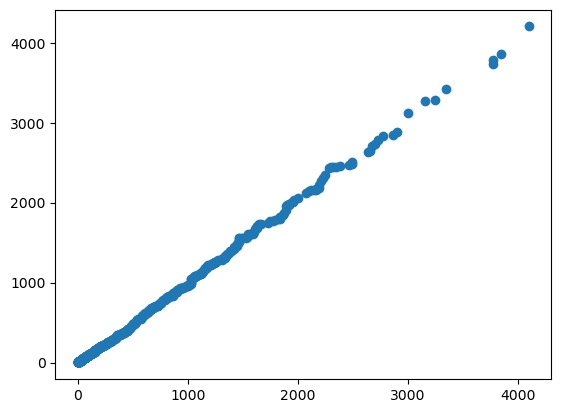

In [37]:
import seaborn as sns

plt.scatter(bikedf['start_station_name'].value_counts(), bikedf['end_station_name'].value_counts())

In [51]:
bikedf[bikedf['start_station_id'].isna()==True].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
269,94E1693C77B96AF0,electric_bike,2022-09-03 19:58:56,2022-09-03 20:39:15,NaN,NaN,S Randolph St & Campbell Ave,31076.0,38.86,-77.05,38.840654,-77.088659,casual
584,19913BD5B6A70343,electric_bike,2022-09-29 11:01:40,2022-09-29 11:06:42,NaN,NaN,3rd St & Riggs Rd NE,31412.0,38.97,-77.01,38.957463,-77.002239,member
585,A0A29ABE4397E450,electric_bike,2022-09-27 11:38:08,2022-09-27 11:42:43,NaN,NaN,3rd St & Riggs Rd NE,31412.0,38.95,-77.01,38.957463,-77.002239,member
633,78FC1FA0EAAA1E0F,electric_bike,2022-09-28 10:40:33,2022-09-28 10:44:50,NaN,NaN,1st & I St SE,31628.0,38.88,-77.00,38.878854,-77.005727,member
1041,C6A5EB0621655A70,electric_bike,2022-09-21 18:50:57,2022-09-21 18:56:47,NaN,NaN,15th & Euclid St NW,31117.0,38.94,-77.03,38.923330,-77.035200,member


In [52]:
bikedf[bikedf['rideable_type']=='electric_bike']['start_station_name'].value_counts()
bikedf[bikedf['rideable_type']=='electric_bike']['end_station_name'].value_counts()

37th & O St NW / Georgetown University            324
14th & Irving St NW                               274
Columbia & Ontario Rd NW                          257
Lamont & Mt Pleasant NW                           240
Adams Mill & Columbia Rd NW                       237
                                                 ... 
N Howard St & Taney Ave                             1
Deanwood Rec Center                                 1
Montgomery College / W Campus Dr & Mannakee St      1
Columbus Ave & Tribeca St                           1
Traville Gateway Dr & Gudelsky Dr                   1
Name: end_station_name, Length: 660, dtype: int64

#### Missing value treatment

In [55]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent',copy=True,verbose=1)

In [70]:
bikedf.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    12950
start_station_id      12950
end_station_name      14685
end_station_id        14685
start_lat                 0
start_lng                 0
end_lat                 564
end_lng                 564
member_casual             0
dtype: int64

In [73]:
bikedf_cat = impute.fit_transform(bikedf[['start_station_id', 'start_station_name', 'end_station_id','end_station_name']])

In [78]:
bikedf_cat = pd.DataFrame(bikedf_cat,columns=['start_station_id', 'start_station_name', 'end_station_id','end_station_name'])

In [84]:
bikedf_1f = bikedf_cat.merge(bikedf.drop(['start_station_id', 'start_station_name', 'end_station_id','end_station_name'],axis=1),left_index=True,right_index=True)

##### Removing the few nulls

In [87]:
bikedf_1f.dropna(inplace=True)

In [89]:
bikedf_1f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385521 entries, 0 to 386084
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_station_id    385521 non-null  object 
 1   start_station_name  385521 non-null  object 
 2   end_station_id      385521 non-null  object 
 3   end_station_name    385521 non-null  object 
 4   ride_id             385521 non-null  object 
 5   rideable_type       385521 non-null  object 
 6   started_at          385521 non-null  object 
 7   ended_at            385521 non-null  object 
 8   start_lat           385521 non-null  float64
 9   start_lng           385521 non-null  float64
 10  end_lat             385521 non-null  float64
 11  end_lng             385521 non-null  float64
 12  member_casual       385521 non-null  object 
dtypes: float64(4), object(9)
memory usage: 41.2+ MB


In [92]:
bikedf_1f['rideable_type'].value_counts()

classic_bike     321495
electric_bike     43433
docked_bike       20593
Name: rideable_type, dtype: int64

In [93]:
bikedf_1f.head()

,start_station_id,start_station_name,end_station_id,end_station_name,ride_id,rideable_type,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,member_casual
0,31419.0,Georgia Ave & Morton St NW,31402.0,14th St Heights / 14th & Crittenden St NW,C40CF15D0DBE584E,classic_bike,2022-09-23 18:42:27,2022-09-24 08:27:11,38.932128,-77.023500,38.947774,-77.032818,member
1,31109.0,7th & T St NW,31647.0,7th St & Massachusetts Ave NE,3788C1944643B399,classic_bike,2022-09-22 01:35:01,2022-09-22 01:49:59,38.915693,-77.021703,38.892220,-76.996020,member
2,31232.0,7th & F St NW / National Portrait Gallery,31624.0,North Capitol St & F St NW,A9E14A3286BB0922,classic_bike,2022-09-16 17:04:11,2022-09-16 17:08:40,38.897283,-77.022191,38.897446,-77.009888,member
3,31231.0,14th & D St NW / Ronald Reagan Building,31618.0,4th & East Capitol St NE,77518ADEB4313901,classic_bike,2022-09-29 17:24:21,2022-09-29 18:32:05,38.894514,-77.031617,38.889955,-77.000349,casual
4,31275.0,New Hampshire Ave & 24th St NW,31275.0,New Hampshire Ave & 24th St NW,7B99FCADC829EAC0,classic_bike,2022-09-13 23:51:12,2022-09-14 00:35:14,38.901755,-77.051084,38.901755,-77.051084,casual


In [96]:
bikedf_1f['started_at'].to_period()-bikedf_1f['ended_at'].to_period()

TypeError: unsupported Type Int64Index

In [ ]:
from datetime import datetime, timedelta
list(zip(pd.to_datetime(bikedf_1f['started_at']),pd.to_datetime(bikedf_1f['ended_at'])))

In [121]:
time_used = []
for i,j in list(zip(pd.to_datetime(bikedf_1f['started_at']),pd.to_datetime(bikedf_1f['ended_at']))):
    time_used.append(j-i)

In [172]:
t = []
for i in range(len(time_used)):
    t.append((str(time_used[i]).split(' ')))

In [173]:
t

[['0', 'days', '13:44:44'],
 ['0', 'days', '00:14:58'],
 ['0', 'days', '00:04:29'],
 ['0', 'days', '01:07:44'],
 ['0', 'days', '00:44:02'],
 ['0', 'days', '01:00:42'],
 ['0', 'days', '00:00:02'],
 ['0', 'days', '00:17:43'],
 ['0', 'days', '00:06:53'],
 ['0', 'days', '00:00:41'],
 ['0', 'days', '00:38:44'],
 ['0', 'days', '00:49:32'],
 ['0', 'days', '00:06:57'],
 ['0', 'days', '00:14:42'],
 ['0', 'days', '00:09:21'],
 ['0', 'days', '00:07:28'],
 ['0', 'days', '00:03:27'],
 ['0', 'days', '00:47:57'],
 ['0', 'days', '00:08:02'],
 ['0', 'days', '00:04:21'],
 ['0', 'days', '00:08:54'],
 ['0', 'days', '00:17:28'],
 ['0', 'days', '00:10:24'],
 ['0', 'days', '00:12:08'],
 ['0', 'days', '00:03:05'],
 ['0', 'days', '00:02:37'],
 ['0', 'days', '00:10:44'],
 ['0', 'days', '00:37:06'],
 ['0', 'days', '00:03:42'],
 ['0', 'days', '00:25:33'],
 ['0', 'days', '00:13:51'],
 ['0', 'days', '00:16:01'],
 ['0', 'days', '00:11:44'],
 ['0', 'days', '00:30:48'],
 ['0', 'days', '00:12:21'],
 ['0', 'days', '00:2

In [187]:
v = []
for i in t:
    match i[1]:
        case('days'):
            v.append(i)

In [186]:
len(v)

385421

In [188]:
len(v)

385521

In [189]:
bikedf_2f = bikedf_1f.__deepcopy__()

In [216]:
bikedf_2f['days_used']  = pd.DataFrame(t)[0].to_list()

bikedf_2f['mins_used']  = pd.DataFrame(t)[2].to_list()

In [221]:
bikedf_2f = bikedf_2f[int(bikedf_2f['days_used']) < 0]

TypeError: cannot convert the series to <class 'int'>

In [223]:
bikedf_2f = bikedf_2f[bikedf_2f['days_used']=='0']
#to drop the values of any

In [224]:
bikedf_2f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385421 entries, 0 to 386084
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_station_id    385421 non-null  object 
 1   start_station_name  385421 non-null  object 
 2   end_station_id      385421 non-null  object 
 3   end_station_name    385421 non-null  object 
 4   ride_id             385421 non-null  object 
 5   rideable_type       385421 non-null  object 
 6   started_at          385421 non-null  object 
 7   ended_at            385421 non-null  object 
 8   start_lat           385421 non-null  float64
 9   start_lng           385421 non-null  float64
 10  end_lat             385421 non-null  float64
 11  end_lng             385421 non-null  float64
 12  member_casual       385421 non-null  object 
 13  days_used           385421 non-null  object 
 14  mins_used           385421 non-null  object 
dtypes: float64(4), object(11)
memory u

In [226]:
bikedf_2f.drop('days_used',axis=1,inplace=True)

/tmp/ipykernel_15771/1489162312.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikedf_2f.drop('days_used',axis=1,inplace=True)


In [233]:
pd.Timestamp(bikedf_2f['mins_used'][0])

Timestamp('2022-10-18 13:44:44')

In [237]:
bikedf_2f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385421 entries, 0 to 386084
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   start_station_id    385421 non-null  object 
 1   start_station_name  385421 non-null  object 
 2   end_station_id      385421 non-null  object 
 3   end_station_name    385421 non-null  object 
 4   ride_id             385421 non-null  object 
 5   rideable_type       385421 non-null  object 
 6   started_at          385421 non-null  object 
 7   ended_at            385421 non-null  object 
 8   start_lat           385421 non-null  float64
 9   start_lng           385421 non-null  float64
 10  end_lat             385421 non-null  float64
 11  end_lng             385421 non-null  float64
 12  member_casual       385421 non-null  object 
 13  mins_used           385421 non-null  object 
dtypes: float64(4), object(10)
memory usage: 52.2+ MB
